# Data Preprocessing

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading our feature set and it's corresponding labels
batting_features = pd.read_csv('batting_new_features.csv')
batting_labels = pd.read_csv('batting_labels.csv')
batting_labels = batting_labels['man_of_match']

In [3]:
# Code to supress future warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
batting_features.columns
for column in list(batting_features.columns)[1:11]:
    batting_features[column] = (batting_features[column] - batting_features[column].mean()) / batting_features[column].std()

# Desicion Tree and Random Forest

In [5]:
DT_acc = []
RF_acc = []

In [6]:
for epoch in range(10):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(batting_features, batting_labels, test_size=0.20, random_state=epoch*10)
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

    # Train the decision tree classifier
    clf_dt = DecisionTreeClassifier()
    clf_dt.fit(X_train, y_train)
    clf_rf = RandomForestClassifier(n_estimators=10, random_state=epoch*10)
    clf_rf.fit(X_train, y_train)

    # Make predictions
    y_pred_dt = clf_dt.predict(X_test)
    y_pred_rf = clf_rf.predict(X_test)
    
    # Calculate the accuracy
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    DT_acc.append(accuracy_dt)
    RF_acc.append(accuracy_rf)

In [16]:
for acc in DT_acc:
    print(acc)

0.9398211829436038
0.9405089408528198
0.9405089408528198
0.9284731774415406
0.937414030261348
0.9411966987620357
0.9332874828060522
0.93707015130674
0.9325997248968363
0.9295048143053645


In [8]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [9]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9542640990371389


In [17]:
def plot_acc(epochs, acc, title):
    x = np.arange(1,11,1) * 10
    plt.scatter(x, acc)
    
    plt.title(title)
    plt.xlabel('Seed Values')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

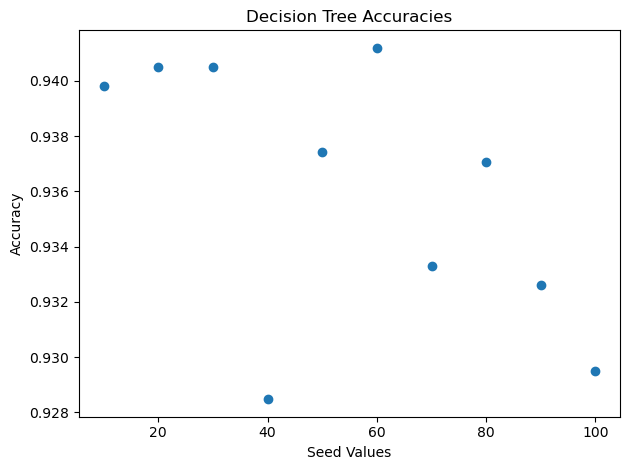

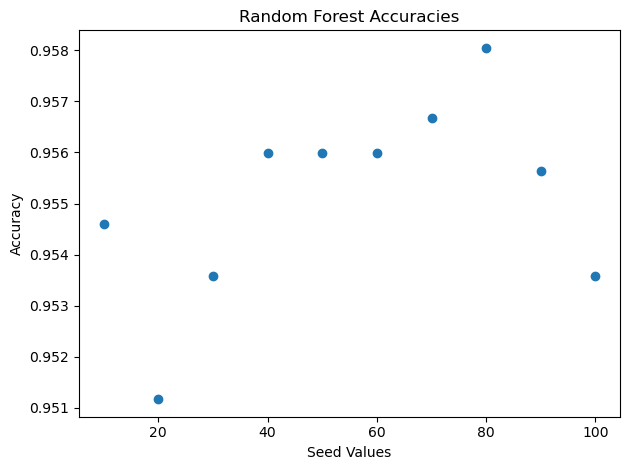

In [18]:
plot_acc(10, DT_acc, 'Decision Tree Accuracies')
plot_acc(10, RF_acc, 'Random Forest Accuracies')